# PSF Model Comparison

After making cutouts of the same star from an open and closed stacked image, I go through several different models.

Try: Gaussian, Moffat, Sinc, Double of each, combinations of each. Look into what Olivier's model is?

So far: single component moffat is the best.  Haven't yet tried sinc or combinations therof.

In [8]:
import sys
sys.path.append('/users/fatima/Desktop/code/python/imaka')
from imaka.analysis import psf_models as mod
%matplotlib inline

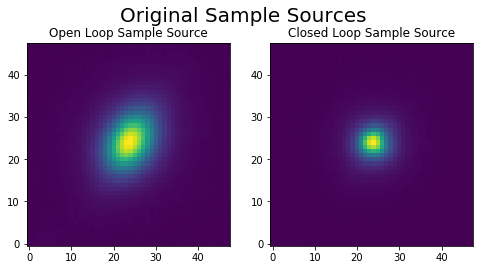

In [2]:
open_file = "//Users/fatima/data/imaka/RUN5/20170520/FLI/reduce/stacks/FLD2_2_stack_open.fits" #FLD2_2/obj0032_o_clean.fits"
closed_file = "//Users/fatima/data/imaka/RUN5/20170520/FLI/reduce/stacks/FLD2_2_stack_closedA.fits"# FLD2_2/obj0034_cA_clean.fits
open_cut, closed_cut = mod.plot_samples(open_file, 2964.785, 199.198, closed_file, 2963.890, 200.025, 48)

## Single Elliptical Gaussian

Least Squares Sum -  Open Loop :  2.06e-05
FUV -  Open Loop :  7.02e-03
Least Squares Sum -  Closed Loop :  1.55e-04
FUV -  Closed Loop :  2.30e-02


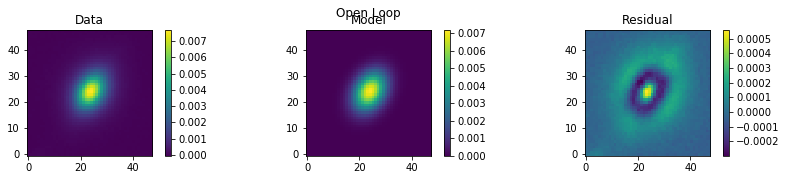

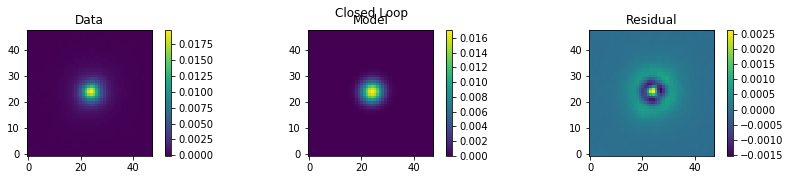

In [3]:
open_fit = mod.model_plot("Gaussian", open_cut, 1, title="Open Loop")
closed_fit = mod.model_plot("Gaussian", closed_cut, 1, fignumber=2, title="Closed Loop")

## Single Elliptical Moffat

Least Squares Sum -  Open Loop :  2.78e-06
FUV -  Open Loop :  9.45e-04
Least Squares Sum -  Closed Loop :  1.24e-05
FUV -  Closed Loop :  1.84e-03


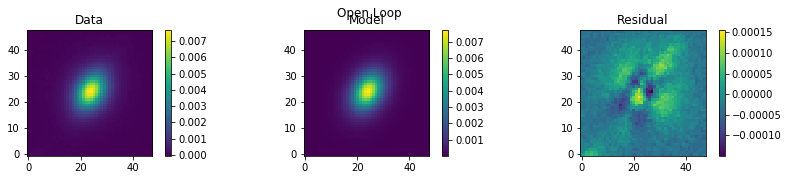

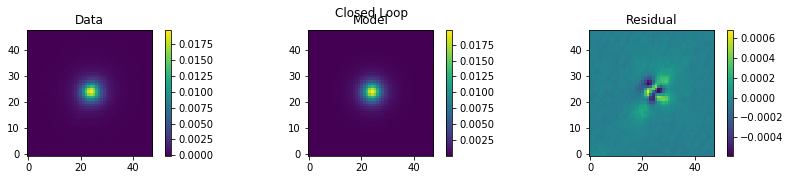

In [4]:
open_fit = mod.model_plot("Moffat", open_cut, 1, x_wid=4, y_wid=6, title="Open Loop")
closed_fit = mod.model_plot("Moffat", closed_cut, 1, x_wid=3, y_wid=3, fignumber=2, title="Closed Loop")

## Interlude for Parameter Estimation

Before starting the two component models, I want to analyze the psf a bit in order to be able to feed the fitter better initial estimations of the fit.  I'll look at 1-D slices of the images, through two axes each, to try to get a sense of the widths of the different components.  After looking at it, I don't really see a way to extract two different widths... Ask about it later.

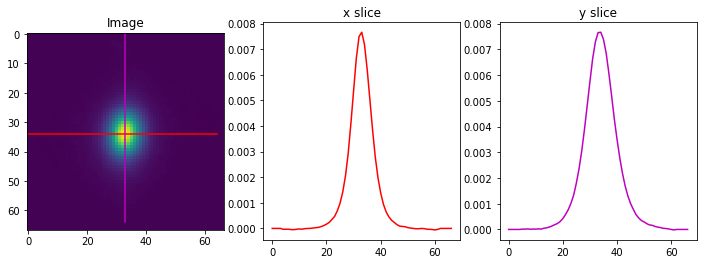

In [5]:
mod.plot_xy_psf(open_cut, -0.6145398744659072)

# Two Component Models

Besides trying to look at the above profiles, I tried estimating initial parameters for a 2 component fit by fitting a single model, then fitting a second model to the residual, and then using the values for those two indivual fits.

## Two Component Gaussian

Least Squares Sum -  Open Loop :  1.53e-06
FUV -  Open Loop :  5.20e-04
Least Squares Sum -  Closed Loop :  1.15e-05
FUV -  Closed Loop :  1.70e-03


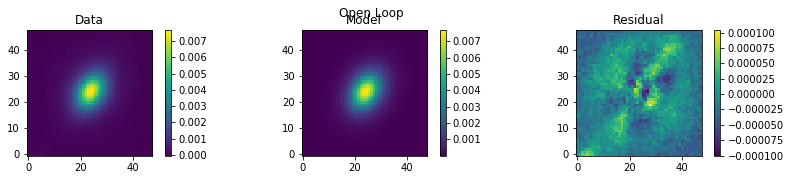

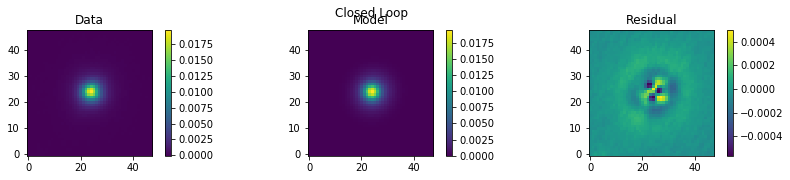

In [6]:
mod.model_plot_double("Gaussian", open_cut, amp=1, x_wid_0=3.8, y_wid_0=5.5, x_wid_1=1, y_wid_1=2, angle=-3.667, fignumber=1, title="Open Loop");
mod.model_plot_double("Gaussian", closed_cut, amp=1, x_wid_0=2.7, y_wid_0=2.8, x_wid_1=1, y_wid_1=1, fignumber=2, title="Closed Loop");

## Two Component Moffat

Least Squares Sum -  Open Loop :  2.84e-06
FUV -  Open Loop :  9.66e-04
Least Squares Sum -  Closed Loop :  2.55e-05
FUV -  Closed Loop :  3.78e-03


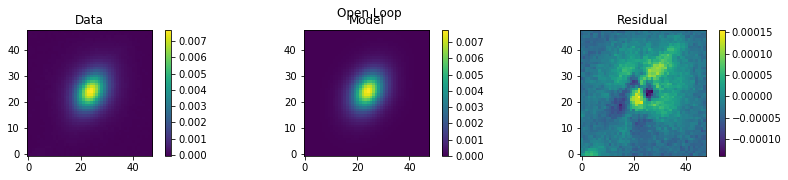

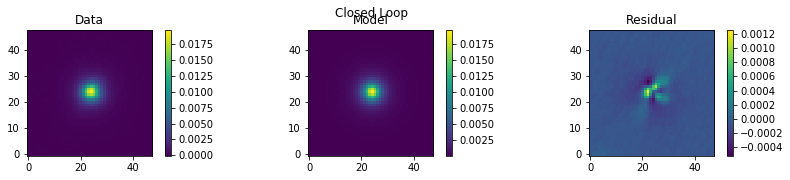

In [7]:
mod.model_plot_double("Moffat", open_cut, amp=1, x_wid_0=8.4, y_wid_0=11.8, x_wid_1=1, y_wid_1=2, fignumber=1, title="Open Loop");
mod.model_plot_double("Moffat", closed_cut, amp=1, x_wid_0=8.4, y_wid_0=11.8, x_wid_1=1, y_wid_1=1, fignumber=2, title="Closed Loop");